<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Линейная регрессия</a></span><ul class="toc-item"><li><span><a href="#Визуальный-анализ" data-toc-modified-id="Визуальный-анализ-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Визуальный анализ</a></span></li><li><span><a href="#Регрессия" data-toc-modified-id="Регрессия-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Регрессия</a></span></li><li><span><a href="#Анализ-остатков" data-toc-modified-id="Анализ-остатков-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Анализ остатков</a></span></li></ul></li><li><span><a href="#Временные-ряды" data-toc-modified-id="Временные-ряды-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Временные ряды</a></span><ul class="toc-item"><li><span><a href="#anti-diabetic-drugs" data-toc-modified-id="anti-diabetic-drugs-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>anti-diabetic-drugs</a></span><ul class="toc-item"><li><span><a href="#стабилизации-дисперссии-и-дифференцирования-ряда" data-toc-modified-id="стабилизации-дисперссии-и-дифференцирования-ряда-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>стабилизации дисперссии и дифференцирования ряда</a></span></li><li><span><a href="#анализ-ACF-и-PACF-и-подбор-гиперпараметров-SARIMA" data-toc-modified-id="анализ-ACF-и-PACF-и-подбор-гиперпараметров-SARIMA-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>анализ ACF и PACF и подбор гиперпараметров SARIMA</a></span></li><li><span><a href="#модель-SARIMA-с-наилучшими-гиперпараметрами" data-toc-modified-id="модель-SARIMA-с-наилучшими-гиперпараметрами-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>модель SARIMA с наилучшими гиперпараметрами</a></span></li><li><span><a href="#анализ-остатков-модели" data-toc-modified-id="анализ-остатков-модели-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>анализ остатков модели</a></span></li><li><span><a href="#прогноз" data-toc-modified-id="прогноз-2.1.5"><span class="toc-item-num">2.1.5&nbsp;&nbsp;</span>прогноз</a></span></li></ul></li></ul></li></ul></div>

In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 5)


In [214]:
# библиотеки, которые понадобятся для построения ленейной регрессии
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.graphics.regressionplots import plot_leverage_resid2

In [215]:
from statsmodels.graphics.gofplots import qqplot 
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [216]:
import statsmodels.api as sm # все, для работы с рядами
from scipy.special import inv_boxcox # обратное преобразование Бокса-Кокса 
from itertools import product # произведения множеств
import warnings # чтобы отключить предупреждения в Python

Баллы за задания
- 1  Линейная регрессия
    - 1.1  Визуальный анализ (25 баллов)
    - 1.2  Регрессия (15 баллов)
    - 1.3  Анализ остатков (15 баллов)
- 2  Временные ряды
    - 2.1  anti-diabetic-drugs (15 баллов)
    - 2.2  female-births (15 баллов)
    - 2.3  shampoo (15 баллов)

In [217]:
!curl https://raw.githubusercontent.com/ilyaaaaaaaa/stat_HSE_DPO_21-Fall/main/data/auto.csv -o auto.csv
!curl https://raw.githubusercontent.com/ilyaaaaaaaa/stat_HSE_DPO_21-Fall/main/data/anti-diabetic-drugs.csv -o anti-diabetic-drugs.csv
!curl https://raw.githubusercontent.com/ilyaaaaaaaa/stat_HSE_DPO_21-Fall/main/data/female-births.csv -o female-births.csv
!curl https://raw.githubusercontent.com/ilyaaaaaaaa/stat_HSE_DPO_21-Fall/main/data/shampoo.csv -o shampoo.csv


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 18276  100 18276    0     0  54647      0 --:--:-- --:--:-- --:--:-- 54882
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  4670  100  4670    0     0  13451      0 --:--:-- --:--:-- --:--:-- 13497
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  6220  100  6220    0     0  17187      0 --:--:-- --:--:-- --:--:-- 17229
  % Total    % Received % Xferd  Average Speed   

# Линейная регрессия

В файле auto.csv находятся данные, которые описывают характеристики 392 автомобилей. 

А именно, в данных вы найдете следующие столбцы:
1. mpg — расход топлива (миль/галлон);
2. cylinders — количество цилиндров мотора;
3. displacement — объем мотора (куб. дюйм);
4. horsepower — мощность мотора (в лошадиных силах);
5. weight — вес (тысяч фунтов);
6. acceleration — время, за которое автомобиль разгоняется до 60 mph; 
7. year — год автомобиля (по модулю 100);
8. origin — место производства (1 — Америка, 2 — Европа, 3 — Япония); 
9. name — название автомобиля.

Задания
- Визуально проанализируйте взаимосвязь между расходом топлива и остальными переменными
    - базовый код написан 
    - нужно проанализировать графики и прокомментировать наблюдения - обратите внимание на вопросы
    - по усмотрению можно сделать дополнительный анализ 
- Подготовьте данные для построения линейной регрессии
---
- Постройте линейную регрессионную модель для предсказания расхода топлива по этим данным
- Интерпретируйте значения коэффициентов регрессии (влияние каждого признака на отклик). Какие признаки влияют на расход топлива и как?
---
- Проанализируйте остатки и проверьте корректность модели


In [218]:
df = pd.read_csv('auto.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [219]:
df.shape

(392, 9)

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


В данных нет пропусков, значит обрабатывать их не надо.

In [221]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


## Визуальный анализ

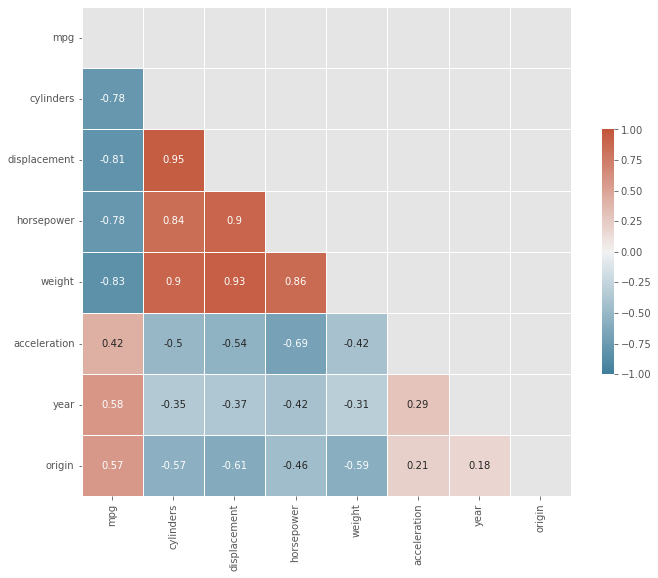

In [222]:
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, 
            annot=True, 
            center=0, vmin=-1, vmax=1,
           )
plt.show()

- Стоит ли использовать все признаки?

Глядя на диагональную корреляционную матрицу нужно ответить на два вопроса:
1. Есть ли признаки с небольшой корреляцией на целевую переменную? В нашей матрицы таковых нет (в противном случае, можно попробовать их удалить).
2. Есть ли сильнокоррелирующие между собой признаки? В нашем случае они есть и их несколько - displacement, horsepower, weight, cylinders. При наличии линейно-зависимых признаках модель имеет все шансы переобучиться. Поэтому нужно оставить либо один признак, наиболее коррелирующий с целевой переменной (weight) или попробовать обучить модель с каждым из них и оставить наилучший результат.

 На этом шаге я предлагаю построить первую модель, посмотреть p-value:

In [223]:
m1 = smf.ols('mpg ~ cylinders + displacement + horsepower + weight + acceleration + year', data=df)
m1fitted = m1.fit()

print(m1fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     272.2
Date:                Sun, 09 Jan 2022   Prob (F-statistic):          3.79e-135
Time:                        23:05:35   Log-Likelihood:                -1036.5
No. Observations:                 392   AIC:                             2087.
Df Residuals:                     385   BIC:                             2115.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -14.5353      4.764     -3.051   

Если p-value>0.05, признак будем считать незначимым, и в следующей модели попробуем его не использовать. А это значит, подтвердилось предположение о том, что стоит оставить один наиболее коррелирующий признак с целевой переменной (weight). 

Посмотрим на распределение остатков и визуально сравним его с нормальным:

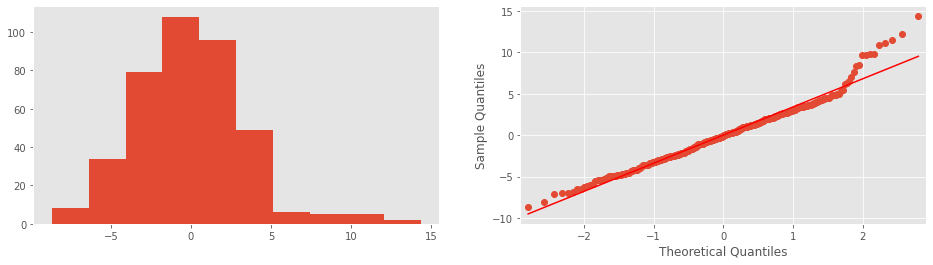

In [224]:
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(16,4)) 

m1fitted.resid.hist(ax=ax1, grid=False)
qqplot(m1fitted.resid, line='r',ax=ax2)

plt.show()

Ситуация с остатками не плохая: распределение остатков напоминает нормальное, есть небольшой хвостик справа. 

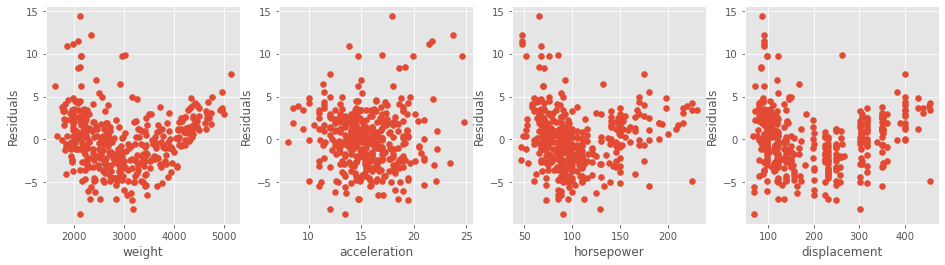

In [225]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(16,4)) 

ax1.scatter(df['weight'],m1fitted.resid)
ax1.set_xlabel('weight')
ax1.set_ylabel('Residuals')

ax2.scatter(df['acceleration'],m1fitted.resid)
ax2.set_xlabel('acceleration')
ax2.set_ylabel('Residuals')

ax3.scatter(df['horsepower'],m1fitted.resid)
ax3.set_xlabel('horsepower')
ax3.set_ylabel('Residuals')

ax4.scatter(df['displacement'],m1fitted.resid)
ax4.set_xlabel('displacement')
ax4.set_ylabel('Residuals')

plt.show()

На этих графиках похоже, что остатки расположены несимметрично относительно нуля. Так может произойти, например, если зависимость отклика от признака не является линейной. 

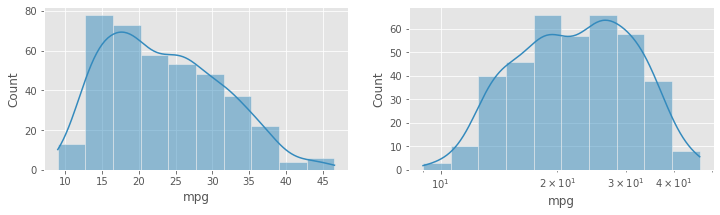

In [226]:
plt.figure(figsize=(12,3))
plt.subplot(121)
sns.histplot(df['mpg'], bins=10, kde=True)
plt.subplot(122)
sns.histplot(df['mpg'], bins=10, log_scale=True, kde=True);


- Нужно ли логарифмирование?

Нужно провести логарифмирование, тк на этом графике и графиках распределения остатков мы видим тяжелый хвост справа.

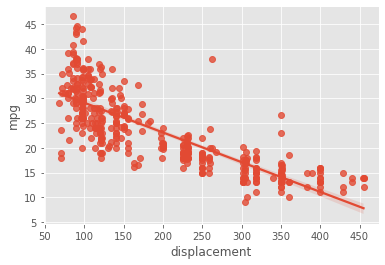

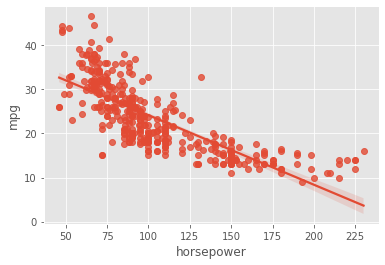

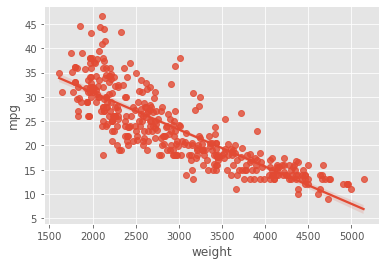

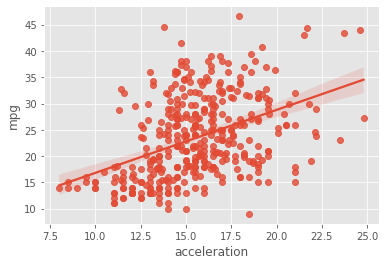

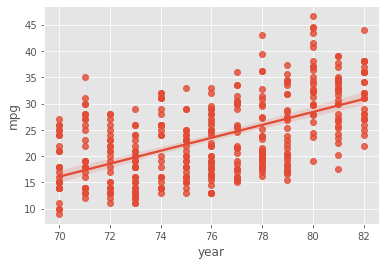

In [227]:
for x in ['displacement','horsepower','weight','acceleration','year']:
    sns.regplot(data=df, x=x, y='mpg',  
#                 logx=True
               )
    plt.show()

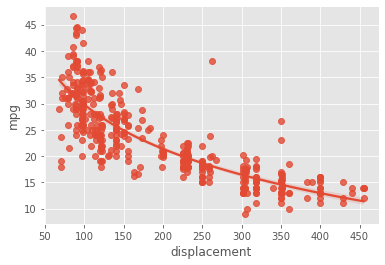

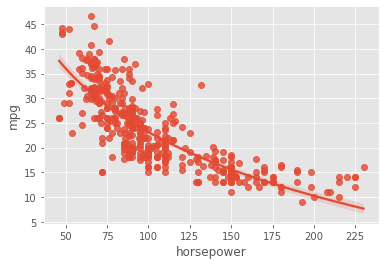

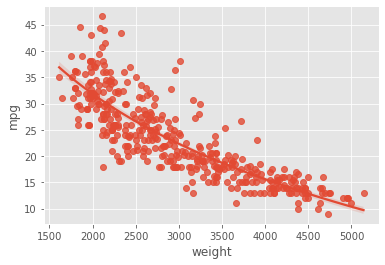

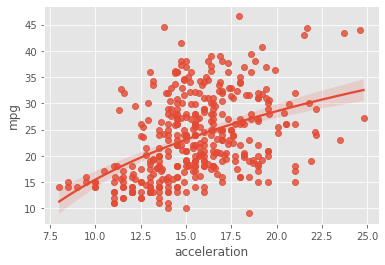

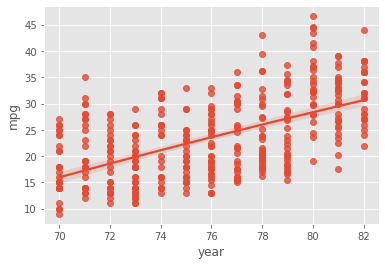

In [228]:
for x in ['displacement','horsepower','weight','acceleration','year']:
    sns.regplot(data=df, x=x, y='mpg',  
                 logx=True
               )
    plt.show()

- Стоит ли попробовать логарифмировать некоторые признаки?

Если данные имеют асимметричное распределение (скошенное влево или вправо), тогда мы можем применить к ним логарифмирование. Распределение можно посмотреть ниже. Предлагаю логарифмировать: displacement, horsepower, weight, acceleration. На графиках видно, что между ними и целевой переменной нелинейная зависимость (похоже как раз на логарифмическую).

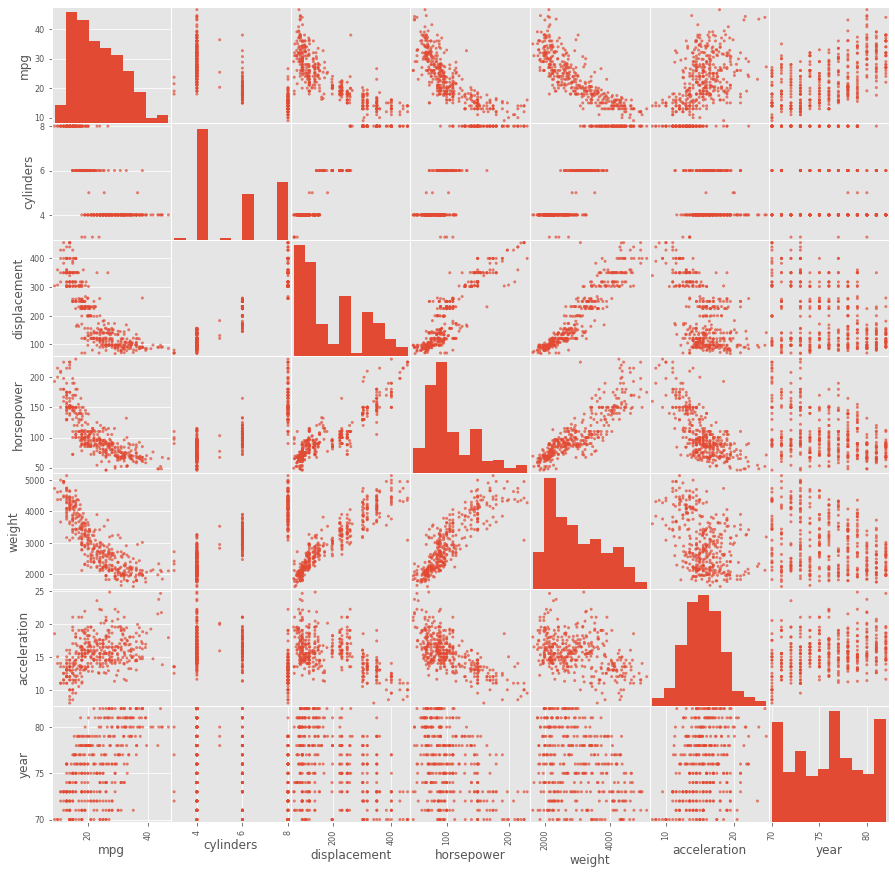

In [229]:
# для количественных признаков выведем матрицу диаграмм рассеяния

pd.plotting.scatter_matrix(df[['mpg', 'cylinders', 'displacement', 'horsepower',
                               'weight', 'acceleration', 'year']], figsize=(15, 15), alpha=0.7)
plt.show()

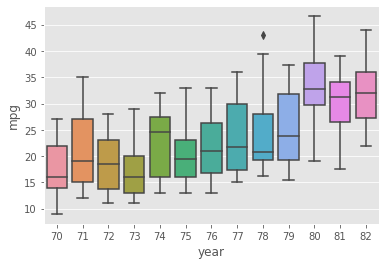

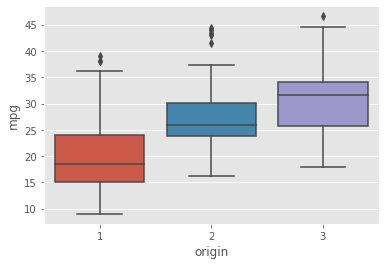

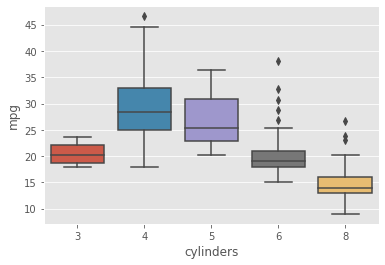

In [230]:
for x in ['year','origin','cylinders']:
    sns.boxplot(data=df, x=x, y='mpg');
    plt.show()

- Все ли признаки действительно числовые?

Нет, признак "origin" (место производства: 1 — Америка, 2 — Европа, 3 — Япония) является категориальным. Мы его преобразуем через OHC, это допустимо в нашем случае, тк признак имеет всего 3 значения. Признак "name" тоже является категориальным и содержит 301 различное значение. По хорошему, можно было бы распарсить имя автомобиля, выделить марку и модель автомобиля. Но я удалю этот признак, сегодня надо сдать задание.

Еще на графиках видно, что присутствуют выбросы. Их можно попробовать удалить и посмотреть как это повлияет на качество модели.

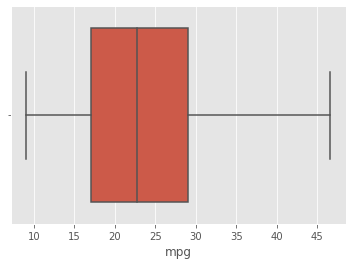

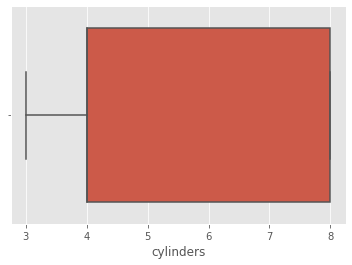

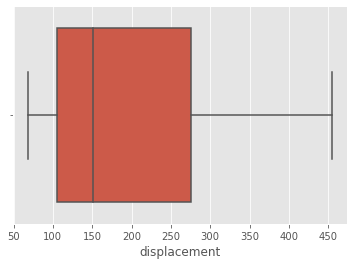

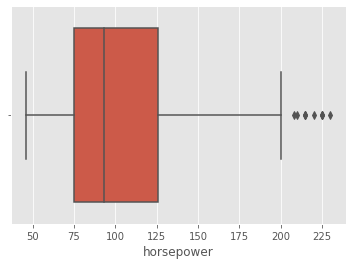

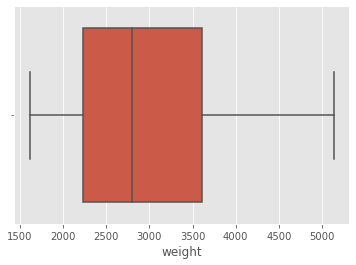

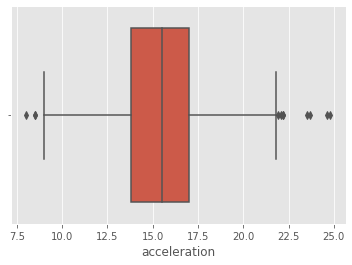

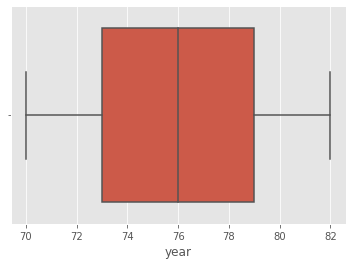

In [231]:
for x in ['mpg', 'cylinders', 'displacement', 'horsepower',
                               'weight', 'acceleration', 'year']:
    sns.boxplot(data=df, x=x, orient = "h")
    plt.show()

## Регрессия

Итак, построим несколько моделей линейной регрессии, чтобы отследить как каждый шаг влияет на ее качество.
Нам нужно:
1. Закодировать категориальный признак "origin" через ohc.
2. Добавить стандартизацию данных, чтобы можно было интерпретировать результаты (веса будут иметь один масштаб)
3. Попробовать удалить незначимые признаки cylinders,displacement,horsepower,acceleration.
4. Логарифмировать целевую переменную.
5. Логарифмировать признаки (displacement, horsepower, weight, acceleration), если они остануться в модели.
6. Удалить выбросы.

In [232]:
di={1:'America',2:'Europe',3:'Japan'}
df.replace({"origin": di}, inplace=True)

In [233]:
df_OHC = pd.get_dummies(df, 
                                  prefix = ['origin'], 
                                  columns = ['origin'],       
                                  drop_first = True)
df_OHC.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,name,origin_Europe,origin_Japan
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu,0,0
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320,0,0
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite,0,0
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst,0,0
4,17.0,8,302.0,140,3449,10.5,70,ford torino,0,0


In [234]:
#y=df_OHC['mpg']
#X = df_OHC.drop(['mpg','name'], axis=1)

In [235]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_sc=scaler.fit_transform(X)

In [236]:
#df_OHC_sc= pd.concat([y, pd.DataFrame(data=X_sc,columns=['cylinders','displacement','horsepower','weight','acceleration','year','origin_America','origin_Europe','origin_Japan'])], axis=1)
#df_OHC_sc

In [237]:
m2 = smf.ols('mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin_Europe + origin_Japan', data=df_OHC)
m2fitted = m2.fit()

print(m2fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     224.5
Date:                Sun, 09 Jan 2022   Prob (F-statistic):          1.79e-139
Time:                        23:05:46   Log-Likelihood:                -1020.5
No. Observations:                 392   AIC:                             2059.
Df Residuals:                     383   BIC:                             2095.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -17.9546      4.677     -3.839

Качество модели подрастает.
Следующим шагом я попробовала удалить незначимые признаки по одному, все вместе и попарно. Это удаление не прибавляет качества модели. Поэтому все признаки оставляем как есть. Код не привожу, чтобы не запустаться в моделях.

In [238]:
m3 = smf.ols('np.log(mpg) ~ cylinders + displacement + horsepower + weight + acceleration + year + origin_Europe + origin_Japan', data=df_OHC)
m3fitted = m3.fit()

print(m3fitted.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(mpg)   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     356.1
Date:                Sun, 09 Jan 2022   Prob (F-statistic):          3.56e-172
Time:                        23:05:46   Log-Likelihood:                 285.13
No. Observations:                 392   AIC:                            -552.3
Df Residuals:                     383   BIC:                            -516.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.7115      0.167     10.230

Качество модели выросло, после логорифмирования целевой переменной.

In [239]:
m4 = smf.ols('np.log(mpg) ~ cylinders + np.log(displacement) + np.log(horsepower) + np.log(weight) + np.log(acceleration) + year  + origin_Europe + origin_Japan', data=df_OHC)
m4fitted = m4.fit()

print(m4fitted.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(mpg)   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     395.3
Date:                Sun, 09 Jan 2022   Prob (F-statistic):          7.07e-180
Time:                        23:05:46   Log-Likelihood:                 303.31
No. Observations:                 392   AIC:                            -588.6
Df Residuals:                     383   BIC:                            -552.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                7.2331 

Качество модели выросло, после логорифмирования признаков. На этом этапе я попробовала удалить признаки "cylinders" и "np.log(displacement)", это немного ухудщило качество модели. Поэтому оставим все признаки.                

In [240]:
m4fitted.params

Intercept               7.233126
cylinders              -0.015039
np.log(displacement)    0.017347
np.log(horsepower)     -0.282125
np.log(weight)         -0.588638
np.log(acceleration)   -0.174245
year                    0.030204
origin_Europe           0.050510
origin_Japan            0.047607
dtype: float64

Итоговая модель m4 достаточно хороша, она объясняет примерно $58\%$ вариации отклика — логарифма расхода топлива. 
Она выглядит следующим образом: 

$$
\log(\text{mpg}) \approx 7.2331 
-0.015 \cdot \text{cylinders} + 0.0173  \cdot \log(\text{displacement})
-0.2821 \cdot \log(\text{horsepower}) -0.5886 \cdot \log(\text{weight})
-0.1742 \cdot \log(\text{acceleration}) +0.0302 \cdot \text{year}
+0.0505 \cdot \text{origin_Europe}+0.0476 \cdot \text{origin_Japan}.
$$

На самом деле получились отличные результаты по весам коэффициентов. Наибольший вес у признака "масса". Первая статья в гугл говорит "Основные факторы, влияющие на расход топлива это: профиль дороги, время, скорость, **масса машины**" . Это победа))))

## Анализ остатков

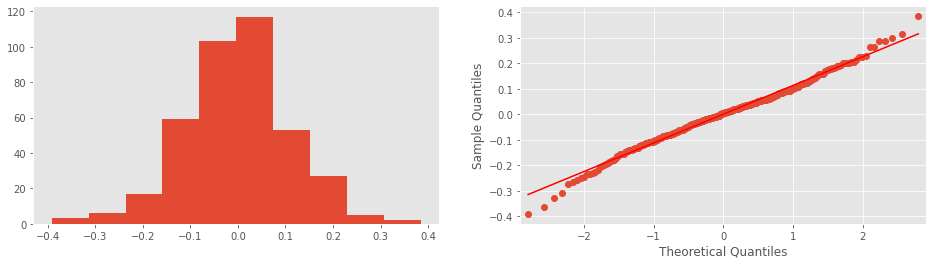

In [241]:
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(16,4)) 

m4fitted.resid.hist(ax=ax1, grid=False)
qqplot(m4fitted.resid, line='r',ax=ax2)

plt.show()

Распределение остатков итоговой модели стало еще больше напоминать нормальное.

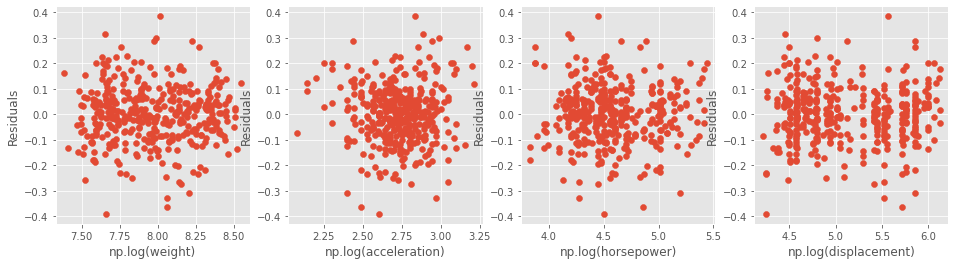

In [242]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(16,4)) 

ax1.scatter(np.log(df_OHC['weight']),m4fitted.resid)
ax1.set_xlabel('np.log(weight)')
ax1.set_ylabel('Residuals')

ax2.scatter(np.log(df_OHC['acceleration']),m4fitted.resid)
ax2.set_xlabel('np.log(acceleration)')
ax2.set_ylabel('Residuals')

ax3.scatter(np.log(df_OHC['horsepower']),m4fitted.resid)
ax3.set_xlabel('np.log(horsepower)')
ax3.set_ylabel('Residuals')

ax4.scatter(np.log(df_OHC['displacement']),m4fitted.resid)
ax4.set_xlabel('np.log(displacement)')
ax4.set_ylabel('Residuals')

plt.show()

На этих графиках остатки расположены симметричнее относительно нуля, по сравнению с моделью 1.

# Временные ряды



Есть 3 датасета с временными рядами
- В `anti-diabetic-drugs.csv` содержатся данные о ежемесячных продажах антидиабетических препаратов в Австралии с 1992 по 2008 год. 
- В `female-births.csv` содержатся данные о количестве новорожденных детей женского пола в 1959 году в Калифорнии. 
- В `shampoo.csv` содержатся данные о ежемесячных продажах шампуня за трехлетний период. 


Проанализируйте каждый из этих рядов и постройте модель SARIMA, чтобы сделать прогноз
- для `anti-diabetic-drugs.csv` - на один год вперед
- для `female-births.csv` - на один месяц вперед
- для `shampoo.csv` - на 3 месяца вперед

Для этого 
- рассмотрите необходимость стабилизации дисперссии и необходимость дифференцирования ряда
- проанализируйте ACF и PACF и подберите гиперпараметры SARIMA
- обучите модель SARIMA с наилучшими гиперпараметрами
- проанализируйте остатки модели

Ваши решения необходимо сопроводить краткими комментариями и выводами, которые Вы сделали на основе анализа. Не забывайте о построении графиков! 

Ориентируйтесь на пример анализа временного ряда в ноутбуке с последнего занятия.

## anti-diabetic-drugs

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


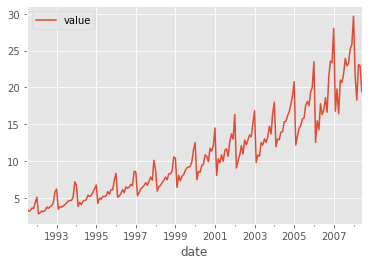

In [243]:
df = pd.read_csv('anti-diabetic-drugs.csv', index_col='date', parse_dates=['date'])
df.plot();
df.head()

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 204 entries, 1991-07-01 to 2008-06-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   204 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [278]:
df

,value,value_boxcox,value_boxcox_diff,value_boxcox_diff2,model
date,,,,,
1991-07-01,3.526591,1.310468,NaN,NaN,1.000000
1991-08-01,3.180891,1.199335,NaN,NaN,1.000000
1991-09-01,3.252221,1.223164,NaN,NaN,1.000000
1991-10-01,3.611003,1.336047,NaN,NaN,1.000000
1991-11-01,3.565869,1.322441,NaN,NaN,1.000000
...,...,...,...,...,...
2008-02-01,21.654285,3.385265,0.306853,0.237492,18.051075
2008-03-01,18.264945,3.180677,-0.096285,-0.403139,21.249813
2008-04-01,23.107677,3.463910,0.409604,0.505889,19.730243


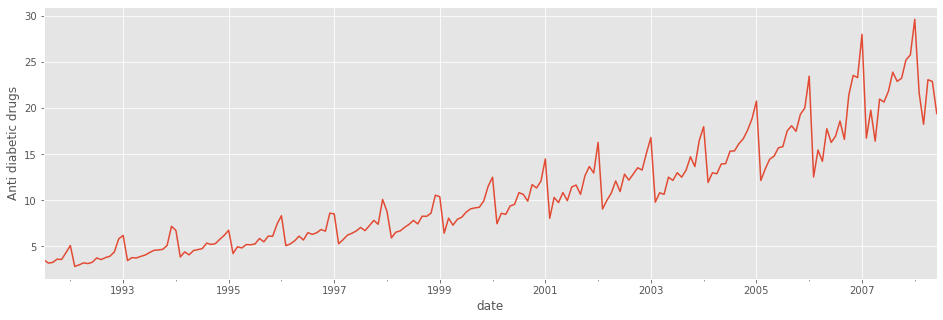

In [245]:
plt.figure(figsize=(16,5))
df.value.plot()
plt.ylabel('Anti diabetic drugs')
plt.show()

Мы видим, что временной ряд не содержит пропуски. У ряда видна очевидная годовая сезонность (самый большой спрос на противодиабетические препараты зимой) и возрастающий тренд. Дисперсия ряда увеличивается. Ряд не стационарен.
Проведем STL-декомпозицию.

<Figure size 1152x720 with 0 Axes>

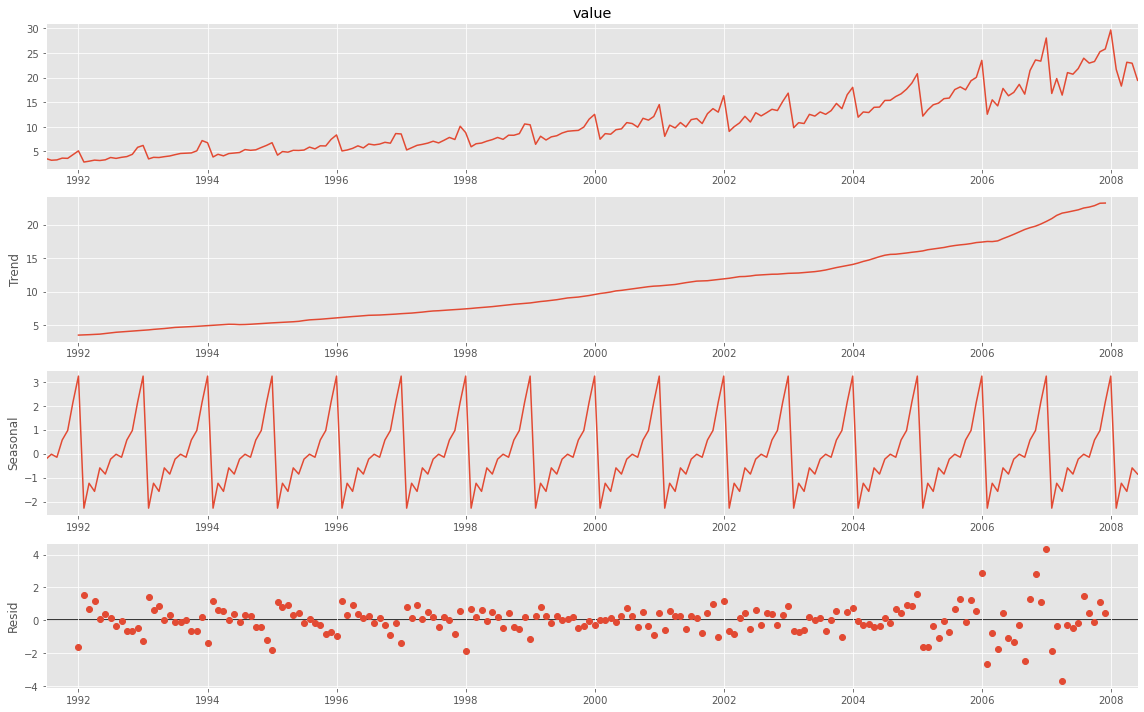

In [246]:
plt.figure(figsize(16,10))
sm.tsa.seasonal_decompose(df.value).plot()
plt.show()

### стабилизации дисперссии и дифференцирования ряда


Стабилизирую дисперсию с помощью преобразованися Бокса-Кокса.

In [247]:
df['value_boxcox'], lmbd = stats.boxcox(df['value'])

In [248]:
print("Оптимальный параметр преобразования Бокса-Кокса: ",lmbd)

Оптимальный параметр преобразования Бокса-Кокса:  0.061505584870954325


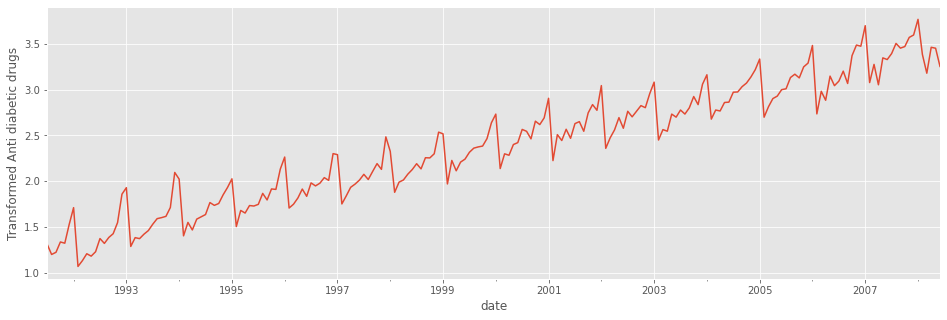

In [249]:
plt.figure(figsize(16,5))
df.value_boxcox.plot()
plt.ylabel('Transformed Anti diabetic drugs')
plt.show()

После преобразования Бокса-Кокса дисперсия ряда стала более стабильной.

<Figure size 1152x576 with 0 Axes>

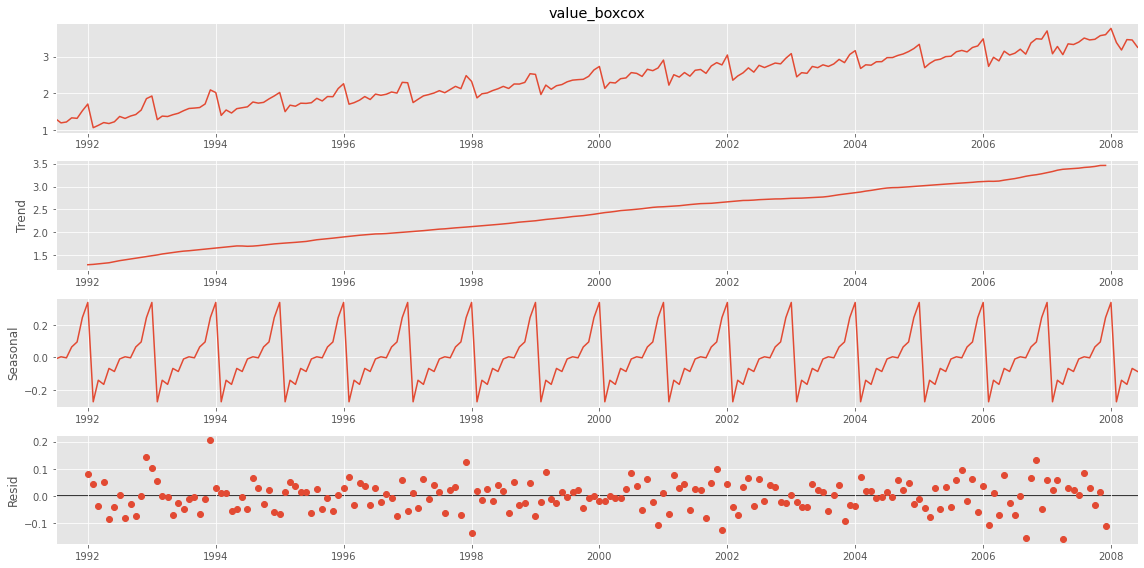

In [250]:
plt.figure(figsize(16,8))
sm.tsa.seasonal_decompose(df.value_boxcox).plot()
plt.show()

По построенным графикам видно, что данные обладают сезонностью и трендом, который необходимо удалить. Этот шаг необходим, чтобы сделать ряд стационарным и подогнать к нему модель SARMA. Сделаем сначала сезонное дифференцирование.

In [251]:
df['value_boxcox_diff'] = df.value_boxcox - df.value_boxcox.shift(12)

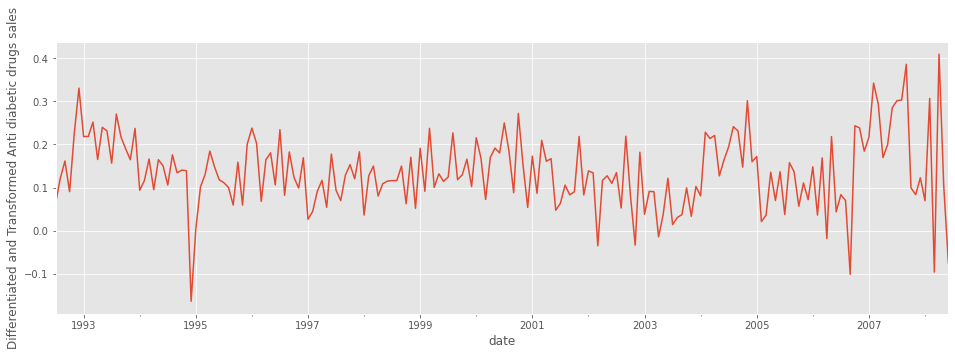

In [252]:
plt.figure(figsize(16,5))
df.value_boxcox_diff[12:].plot()
plt.ylabel('Differentiated and Transformed Anti diabetic drugs sales')
plt.show()

<Figure size 1152x576 with 0 Axes>

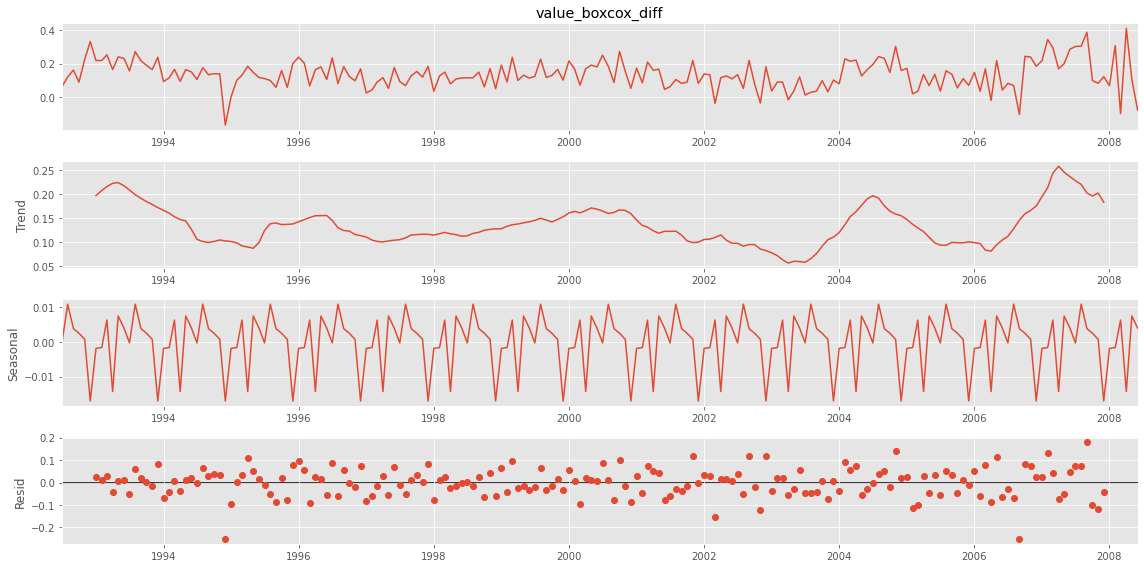

In [253]:
plt.figure(figsize(16,8))
sm.tsa.seasonal_decompose(df.value_boxcox_diff[12:]).plot()
plt.show()

После сезонного дифференцирования пропала сезонность, но есть заметный тренд. Сделаем еще одно дифференцирование.

In [254]:
df['value_boxcox_diff2'] = df.value_boxcox_diff - df.value_boxcox_diff.shift(1)

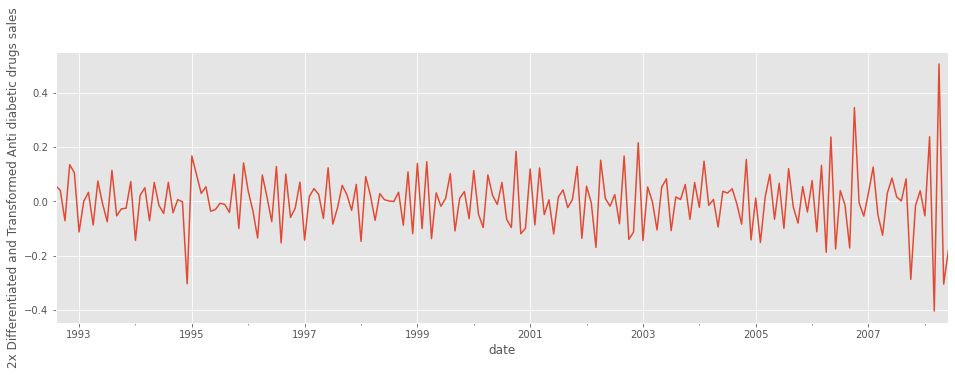

In [255]:
plt.figure(figsize(16,5))
df.value_boxcox_diff2[13:].plot()
plt.ylabel('2x Differentiated and Transformed Anti diabetic drugs sales')
plt.show()

<Figure size 1152x576 with 0 Axes>

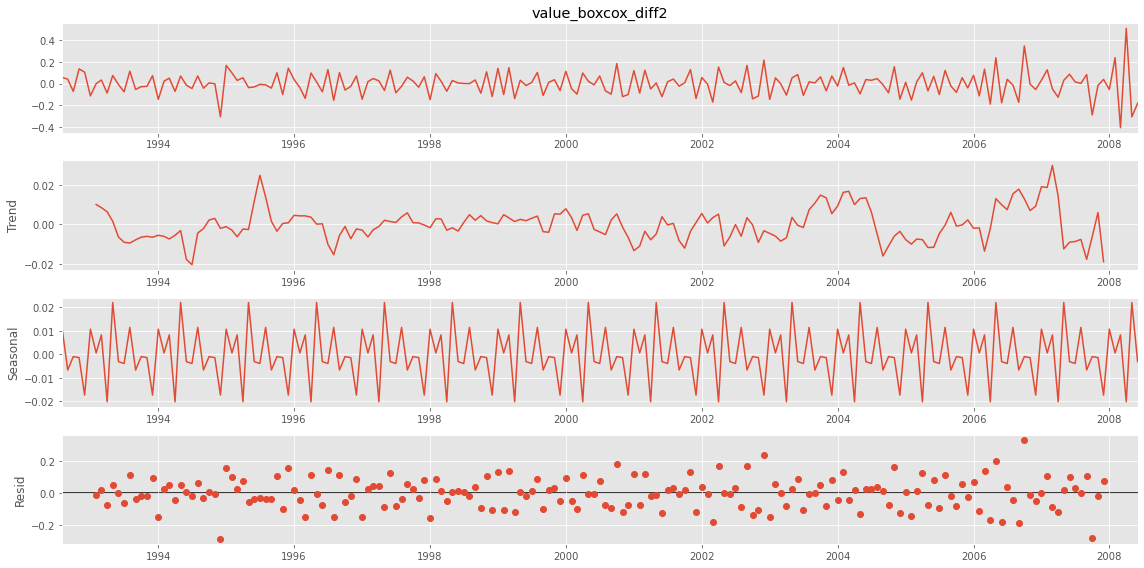

In [256]:
plt.figure(figsize(16,8))
sm.tsa.seasonal_decompose(df.value_boxcox_diff2[13:]).plot()
plt.show()

Теперь наш ряд стал похож на стационарный. Попробуем формально отвергнуть гипотезу о нестационарности с помощью критерия Дики-Фуллера.

In [257]:
print("Критерий Дики-Фуллера для преобразованного ряда: pvalue =",sm.tsa.stattools.adfuller(df.value_boxcox_diff2[13:])[1])

Критерий Дики-Фуллера для преобразованного ряда: pvalue = 5.299278344680579e-05


Гипотеза о нестационарности уверенно отвергается. 

### анализ ACF и PACF и подбор гиперпараметров SARIMA

Чтобы выбрать начальные значения для  𝑝,𝑞  и  𝑃,𝑄 , необходимо построить графики автокорреляционной функции (ACF) и частичной автокорреляционной функции (PACF).

C:\Users\kzolo\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


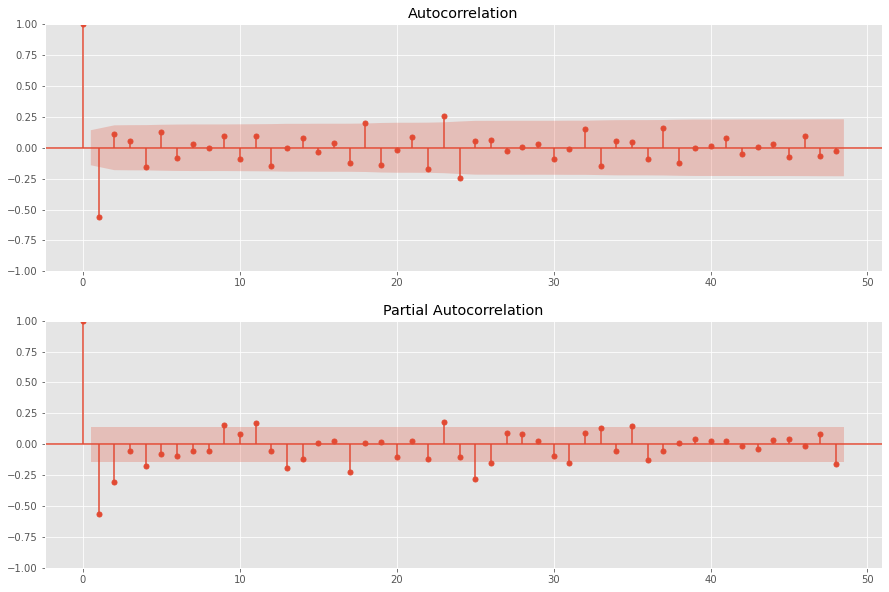

In [258]:
fig, (ax1, ax2) = plt.subplots(nrows=2,figsize=(15,10)) 

sm.graphics.tsa.plot_acf(df.value_boxcox_diff2[13:].values.squeeze(), lags=48, ax=ax1)
sm.graphics.tsa.plot_pacf(df.value_boxcox_diff2[13:].values.squeeze(), lags=48, ax=ax2)

plt.show()

Согласно этим графикам, в качестве начальных значений необходимо взять:  Q=2 ,  q=1 ,  P=4 ,  p=2

In [259]:
# создадим список из значений параметров для перебора моделей

d = D = 1
ps = range(0, 3)
qs = range(0, 2)
Ps = range(0, 5)
Qs = range(0, 3)

parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)

In [260]:
len(parameters_list)

90

In [262]:
results = [] # здесь будем хранить результаты
warnings.filterwarnings('ignore') # не для всех параметров модели будут обучаться; отключим предупреждения

for param in parameters_list:
    #try-except нужен, чтобы обработать случаи, когда модель не обучается
    try:
        model=sm.tsa.statespace.SARIMAX(df.value_boxcox, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    
    #выводим параметры, на которых модель не обучается и переходим к следующему набору
    except ValueError:
        print('Wrong parameters:', param)
        continue
    
    results.append([param, model.aic])

In [263]:
# преобразуем результаты в DataFrame и добавим названия столбцов

result_table = pd.DataFrame(results)
result_table.columns = ['Parameters', 'AIC']

In [264]:
# выведем 5 лучших по AIC моделей 

result_table.sort_values(by = 'AIC', ascending=True).head()

,Parameters,AIC
59,"(1, 1, 4, 2)",-458.553933
52,"(1, 1, 2, 1)",-458.442849
67,"(2, 0, 2, 1)",-457.851600
58,"(1, 1, 4, 1)",-457.727149
53,"(1, 1, 2, 2)",-457.509287


### модель SARIMA с наилучшими гиперпараметрами


Лучшей моделью получилась SARIMA (2,0,1)x(2,1,1).

In [266]:
best_model=sm.tsa.statespace.SARIMAX(df.value_boxcox, order=(2,0,1), seasonal_order=(2,1,1,12)).fit(disp=-1)

In [267]:
print(best_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                       value_boxcox   No. Observations:                  204
Model:             SARIMAX(2, 0, 1)x(2, 1, 1, 12)   Log Likelihood                 224.198
Date:                            Sun, 09 Jan 2022   AIC                           -434.395
Time:                                    23:27:09   BIC                           -411.593
Sample:                                07-01-1991   HQIC                          -425.160
                                     - 06-01-2008                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7072      0.219      3.227      0.001       0.278       1.137
ar.L2          0.2926      0.111   

### анализ остатков модели

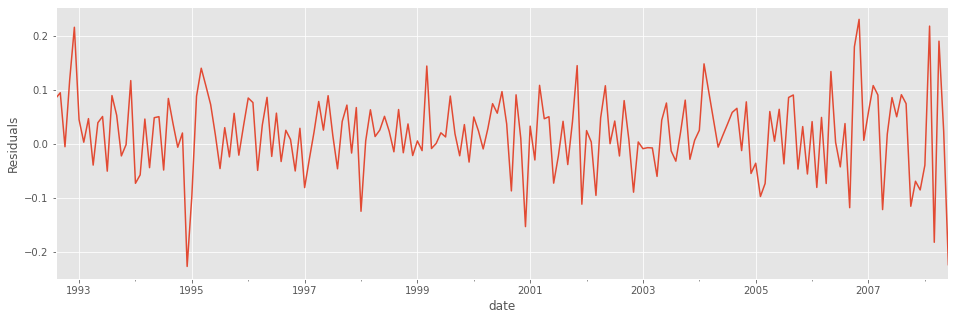

In [268]:
plt.figure(figsize(16,5))
best_model.resid[13:].plot()
plt.ylabel('Residuals')
plt.show()

Остатки выглядят независимо

Несмещенность. Проверим несмещенность с помощью критерия знаков (самый универсальный критерий).

In [269]:
from statsmodels.stats.descriptivestats import sign_test
print("Критерий знаков для остатков: pvalue =",sign_test(best_model.resid[13:])[1])

Критерий знаков для остатков: pvalue = 0.00015384088404918686


Стационарность. Проверим стационарность с помщью критерия Дики-Фуллера.

In [270]:
print("Критерий Дики-Фуллера для остатков: pvalue =",sm.tsa.stattools.adfuller(best_model.resid[13:])[1])

Критерий Дики-Фуллера для остатков: pvalue = 4.915146893643422e-14


ряд стационарный

Неавтокоррелированность. Чтобы определить независимость остаткок, посмотрим на график автокорреляционной функции.

<Figure size 1152x360 with 0 Axes>

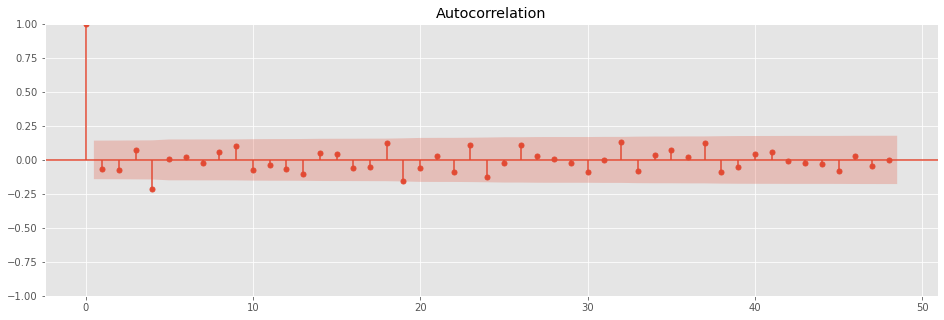

In [271]:
plt.figure(figsize(16,5))
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=48)
plt.show()

Выведем на графике наш ряд и построенную для него модель. Для этого необходимо сделать обратное преобразование Бокса.

In [276]:
df['model'] = inv_boxcox(best_model.fittedvalues, lmbd)

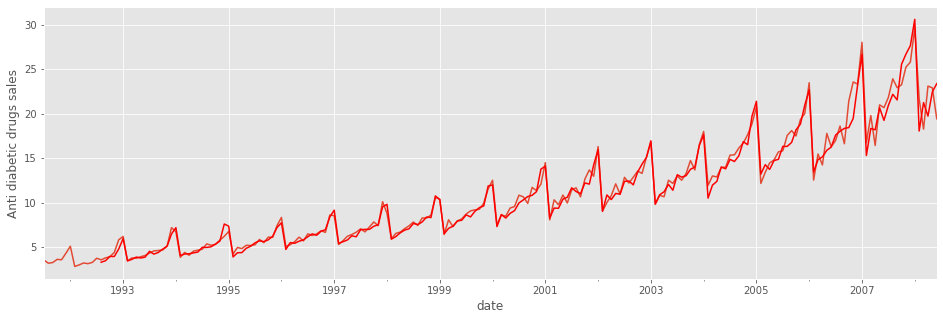

In [277]:
plt.figure(figsize(16,5))
df.value.plot()
df.model[13:].plot(color='r')
plt.ylabel('Anti diabetic drugs sales')
pylab.show()

### прогноз

In [283]:
# сделаем подготовительную работу

plot_data = df[['value','model']]

date_list = [datetime.datetime.strptime("2008-07-01", "%Y-%m-%d") + relativedelta(months=x) for x in range(0,12)]
future = pd.DataFrame(index=date_list, columns= plot_data.columns)
plot_data = pd.concat([plot_data, future])

In [285]:
# построим предсказание, сделаем для него обратное преобразование Бокса-Кокса

forecast = inv_boxcox(best_model.predict(start=204, end=215), lmbd)
forecast.index = date_list

In [286]:
# запишем его в столбец Model

plot_data.loc[date_list, 'model'] = forecast

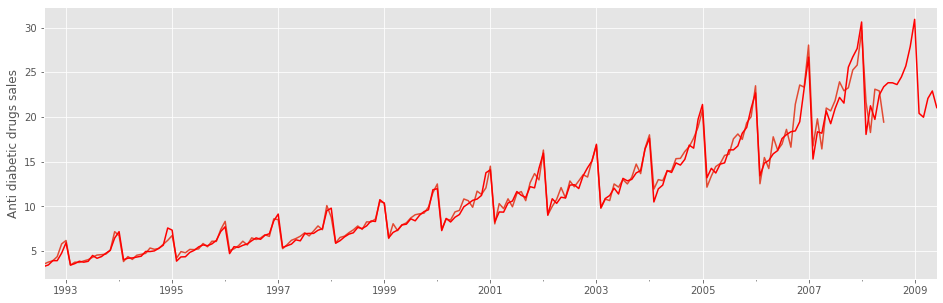

In [287]:
plt.figure(figsize(16,5))
plot_data.value[13:].plot()
plot_data.model[13:].plot(color='r')
plt.ylabel('Anti diabetic drugs sales')
pylab.show()